In [ ]:
# Installing tensorflow 
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 438 kB 56.2 MB/s 
     |████████████████████████████████| 5.9 MB 54.9 MB/s 
     |████████████████████████████████| 1.7 MB 52.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [ ]:
# Checking version 
import tensorflow as tf
tf.__version__

'2.10.0'

In [ ]:
# Import some basic libraries 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Reading Churn Dataset
dataset = pd.read_csv("churn.csv")

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Devide data into dependent and independent feature -- 
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, -1]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# Freature Engineering 
geography = pd.get_dummies(X["Geography"], drop_first = True)
gender = pd.get_dummies(X["Gender"], drop_first = True)

In [ ]:
## Concatinate these column -- 
X = X.drop(["Geography", "Gender"], axis = 1)

In [ ]:
X = pd.concat([X, geography, gender], axis = 1)

In [ ]:
# Splitting data into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
## Freature scaling is required --- 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [ ]:
# Part 2 - Creating the ANN -- 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, ReLU, ELU, PReLU, Dropout

In [ ]:
# Initialize the ANN
classifier = Sequential()

In [ ]:
# Adding Input Layer -
classifier.add(Dense(units = 11, activation = 'relu'))

In [ ]:
# First Hidden layer - 
classifier.add(Dense(units = 7, activation = 'relu'))
# second Hidden layer - 
classifier.add(Dense(units = 6, activation = 'relu'))

In [ ]:
## Output layer - 
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [ ]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Early Stoppping -
import tensorflow as tf 
early_stopping = tf.keras.callbacks.EarlyStopping(
              monitor="val_loss",
              min_delta=0.0001,
              patience=20,
              verbose=1,
              mode="auto",
              baseline=None,
              restore_best_weights=False,
          )

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3229 - accuracy: 0.8664 - val_loss: 0.3758 - val_accuracy: 0.8440
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3202 - accuracy: 0.8653 - val_loss: 0.3752 - val_accuracy: 0.8519
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3161 - accuracy: 0.8645 - val_loss: 0.3824 - val_accuracy: 0.8501
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3171 - accuracy: 0.8649 - val_loss: 0.3985 - val_accuracy: 0.8466
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3148 - accuracy: 0.8653 - val_loss: 0.3802 - val_accuracy: 0.8448
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3156 - accuracy: 0.8643 - val_loss: 0.3832 - val_accuracy: 0.8489
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3131 - accuracy: 0.8675 - val_loss: 0.3701 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

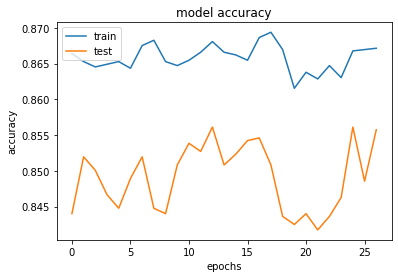

In [ ]:
# Summrise History for accuracy

plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

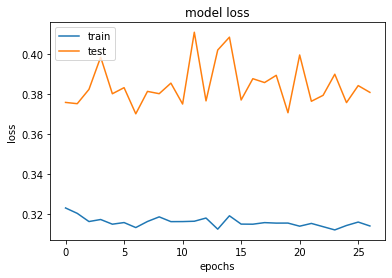

In [ ]:
# Summrise History for Loss

plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
## Making prediction -- 

y_pred = classifier.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_pred = (y_pred >= 0.5)

In [ ]:
# Confusion matrics 
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1471,  124],
       [ 183,  222]])

In [ ]:
# calculate the accuracy 
accuracy_score(y_test, y_pred)

0.8465

In [ ]:
# Get the weights -- 
classifier.get_weights()

[array([[ 2.2518427 ,  0.25139505,  1.2694142 ,  0.3413959 ,  0.33836633,
          0.03475687,  0.16927013, -0.3748087 ,  0.2580048 ,  0.091608  ,
          0.418125  ],
        [-3.019993  ,  0.9981962 , -2.6955726 , -4.5746536 , -6.4840736 ,
         -0.9068639 , -2.0466473 , -5.241967  ,  3.431636  , -1.9865402 ,
         -1.4820465 ],
        [ 0.16324244, -0.06221535,  2.7908669 ,  2.020303  , -0.59176546,
          0.32234356,  1.4677364 ,  0.07507131,  0.12212909,  1.7519407 ,
         -1.5694312 ],
        [-3.96772   , -5.5722065 ,  1.4542042 ,  1.0092684 , -0.83656555,
          0.7618794 , -1.6511172 , -1.2621449 , -1.6921954 , -5.226908  ,
          0.64318556],
        [-3.4386265 , -6.3381133 , -1.1860877 , -1.89385   , -1.2732054 ,
          5.464497  , -0.5035451 ,  1.0933654 , -1.3283862 , -0.3983004 ,
          0.30551502],
        [ 0.65579534, -0.10754477,  0.6999241 ,  2.1873596 , -3.1245692 ,
         -0.45631737,  0.11095074, -0.20243603,  0.252185  , -1.7051107